In [67]:
import torch
from torch.utils.data import Dataset,DataLoader,SequentialSampler,RandomSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch import optim,nn
import os
# import torchvision.transforms.functional as func
import cv2
import numpy as np
import glob

In [7]:
# from numpy import imag


class shape_dataset(Dataset):
    def __init__(self,root,label,sh_id):
        self.root=root
        self.label=label
        self.sh_id=sh_id
        self.path=os.path.join(self.root,self.label)
        self.img_list=os.listdir(self.path)
    def __getitem__(self,index):
        self.image=cv2.imread(os.path.join(self.path,self.img_list[index]),cv2.IMREAD_GRAYSCALE)
        self.image=cv2.resize(self.image,(50,50),cv2.INTER_LINEAR)
        self.image=torch.tensor(self.image)
        self.image=self.image.float()/255.0
        self.label=torch.tensor(self.sh_id)
        self.label=self.label.float()
        return self.image,self.label

    def __len__(self):
        return len(self.img_list)

50


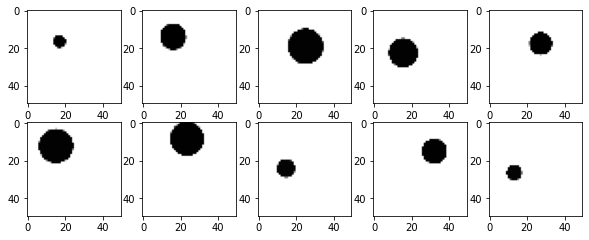

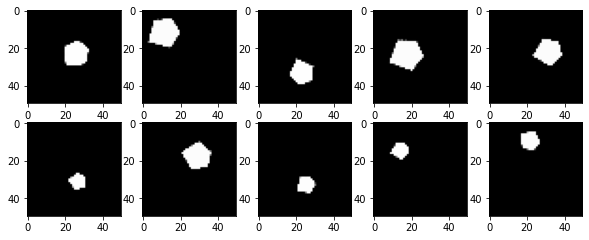

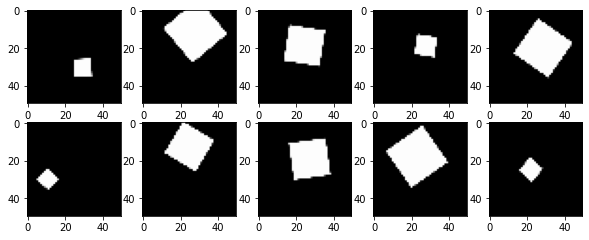

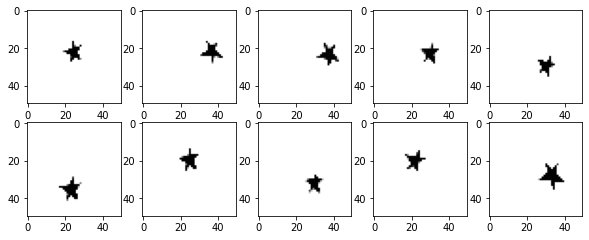

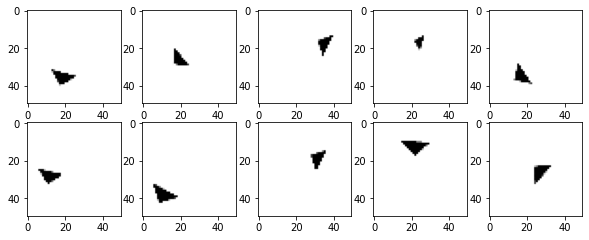

In [8]:

path_images=glob.glob("Shape_Data/**/*.jpg")

folder='Shape_Data'
classes=os.listdir(folder)
datasets=[]
sh_id=1
for i in (classes):
    # path=os.path.join(folder,i)
    label=i
    # print(len(os.listdir(os.path.join(folder,i))))
    datasets.append(shape_dataset(folder,label,sh_id))
    sh_id+=1
# print(datasets[0])
    



# fig= plt.figure(figsize=(10, 10))
count=0

for i in range(5):
    # print(datasets[i][0][0])
    fig= plt.figure(figsize=(10, 10))

    for j in range(10):
        count+=1
        fig.add_subplot(5,5,j+1)
        plt.imshow(datasets[i][j][0],cmap="gray")
print(count)

800 200
1
800 200
2
800 200
3
800 200
4
800 200
5


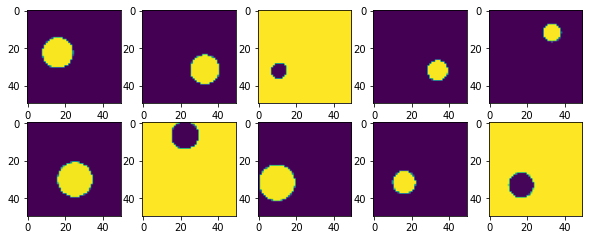

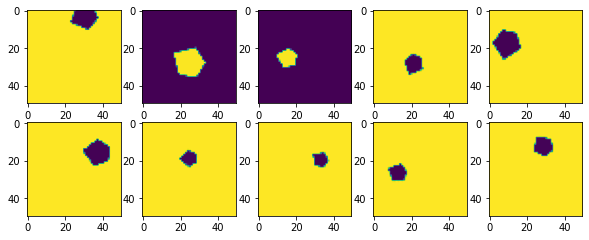

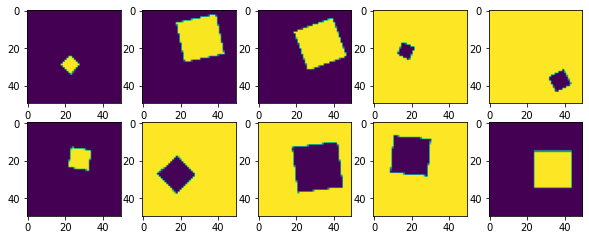

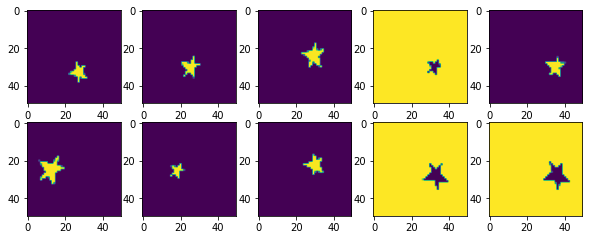

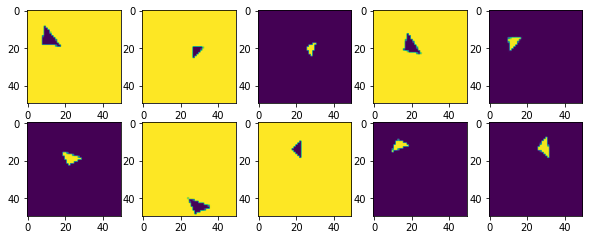

In [ ]:
batch_size=10
train_loader=[]
test_loader=[]
for i in range(len(classes)):
    


    train_size = int(0.8 * len(datasets[i]))
    test_size = int(0.2*len(datasets[i]))

    train_dataset, test_dataset = torch.utils.data.random_split(datasets[i], [train_size, test_size])
    print(train_size,test_size)

    # print("Train dataset:::",train_dataset[0:],"Test dataset:::",test_dataset)

    # print(train_dataset,test_dataset)

    train_loader.append(DataLoader(dataset = train_dataset, batch_size = len(train_dataset)))
    test_loader.append(DataLoader(dataset = test_dataset, batch_size=len(test_dataset)))

    # sampler=SequentialSampler(datasets[i])
    # data_loader=DataLoader(dataset=datasets[i],batch_size=batch_size,sampler=sampler)
    print(len(train_loader))
    count=0
    for x,y in train_loader[i]:
        # print(y)
        fig= plt.figure(figsize=(10, 10))
        for j in range(10):
            fig.add_subplot(5,5,j+1)
            plt.imshow(x[j])
        if(count==0):
            break

In [ ]:
class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        x=x.reshape(-1,2500)
        out=self.linear(x)
        # print(out)
        return out


In [ ]:
criteria=nn.MSELoss()

In [22]:
torch.manual_seed(1)
lr=LR(2500,1)

# print(len(data_loader))
# print()

sgd=optim.SGD(lr.parameters(),0.0004)


print(len(list(lr.parameters())[0][0]))


def Shape_nn(lr,train_loader,test_loader,sgd,criteria):
    fig=plt.figure(figsize=(10,10))

    full_test_loss=[]
    full_train_loss=[]

    for i in range(5):
        test_loss=[]
        train_loss=[]
        for epoch in range(100):
        
            for x,y in train_loader[i]:
                # print(x)
                yhat_train=lr(x)
            
                trloss=criteria(y,yhat_train)

                # print("y, yhat  ",y,yhat_train)
                sgd.zero_grad()
                trloss.backward()
                sgd.step()
            train_loss.append(trloss.detach().numpy())
            print(f"for epoch {epoch} | train_loss :: {trloss}".format(epoch,trloss))
            
            # train_loss.append(train_loss)
            # fig.add_subplot(5,5,epoch+1)
            # plt.plot(train_loss)
            print(yhat_train.shape)
            for x2,y2 in test_loader[i]:
                yhat_test=lr(x2)
                tsloss=criteria(yhat_test,y2)
            print(f"for epoch {epoch} | test_loss :: {tsloss}".format(epoch,tsloss)) 
            test_loss.append(tsloss.detach().numpy())       
        
        # print(f"for epoch {i} | train_loss :: {train_loss03978462144732475[i]}".format(i,train_loss[i]))

        

    
        # print("epoch {}:: , train_loss {} ::: , test_loss {}".format(epoch,trloss,tsloss))
    return lr,full_train_loss,full_test_loss

2500


In [23]:
predicted,test_loss,train_loss=Shape_nn(lr,train_loader,test_loader,sgd,criteria)

for epoch 0 | train_loss :: 1.1222496032714844
torch.Size([800, 1])
for epoch 0 | test_loss :: 0.4345279335975647
for epoch 1 | train_loss :: 0.4712112843990326
torch.Size([800, 1])
for epoch 1 | test_loss :: 0.4301278293132782
for epoch 2 | train_loss :: 0.4671536684036255
torch.Size([800, 1])
for epoch 2 | test_loss :: 0.42907723784446716
for epoch 3 | train_loss :: 0.46590638160705566
torch.Size([800, 1])
for epoch 3 | test_loss :: 0.4280671775341034
for epoch 4 | train_loss :: 0.46467718482017517
torch.Size([800, 1])
for epoch 4 | test_loss :: 0.4270636737346649
for epoch 5 | train_loss :: 0.4634539484977722
torch.Size([800, 1])
for epoch 5 | test_loss :: 0.4260651767253876
for epoch 6 | train_loss :: 0.4622364640235901
torch.Size([800, 1])
for epoch 6 | test_loss :: 0.4250713884830475
for epoch 7 | train_loss :: 0.4610247015953064
torch.Size([800, 1])
for epoch 7 | test_loss :: 0.42408251762390137
for epoch 8 | train_loss :: 0.45981884002685547
torch.Size([800, 1])
for epoch 8 | t

<Figure size 720x720 with 0 Axes>

In [24]:
# for i in range(100):
#     print(f"for epoch {i} | train_loss :: {test_loss[i]}".format(i,test_loss[i]))

print(test_loss)

[]


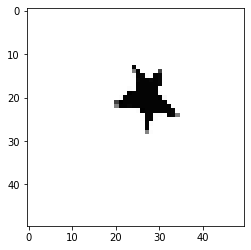

In [65]:
test=cv2.imread("Shape_Data/Star/star210.jpg",cv2.IMREAD_GRAYSCALE)
test=cv2.resize(test,(50,50))
plt.imshow(test,cmap="gray")
test=torch.tensor(test,dtype=torch.float32)/255

In [66]:
print(predicted(test))

tensor([[4.8300]], grad_fn=<AddmmBackward0>)


In [78]:
len(glob.glob("Shape_Data/**/*.jpg"))

5000